# Support Vector Machine

## Problem statement 2:
##### 1) Prepare a classification model using SVM for salary data 


### Importing libraries

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\17. SVM assignment

19-01-2023  00:50    <DIR>          .
19-01-2023  00:50    <DIR>          ..
19-01-2023  00:50    <DIR>          .ipynb_checkpoints
19-01-2023  00:48           563,675 Assignment no.17 - (forest).ipynb
19-01-2023  00:50           101,406 Assignment no.17 - (salary_data).ipynb
15-01-2023  00:57               549 forest fires.txt
15-01-2023  00:57            46,843 forestfires.csv
15-01-2023  00:57               608 Problem_statement(salary_data).txt
15-01-2023  00:57         1,694,474 SalaryData_Test(1).csv
15-01-2023  00:57         3,393,618 SalaryData_Train(1).csv
               7 File(s)      5,801,173 bytes
               3 Dir(s)  115,168,808,960 bytes free


### Reading training data

In [48]:
salary_train = pd.read_csv('SalaryData_Train(1).csv')
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### EDA

In [49]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [50]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [51]:
salary_train.value_counts()

age  workclass          education      educationno  maritalstatus        occupation        relationship     race                 sex      capitalgain  capitalloss  hoursperweek  native          Salary
33    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40             United-States   <=50K    16
35    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40             United-States   <=50K    15
39    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40             United-States   <=50K    14
51    Private            HS-grad       9             Married-civ-spouse   Craft-repair      Husband          White                Male    0            0            40            

In [52]:
salary_train.duplicated().sum()

3258

In [53]:
salary_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [54]:
salary_train['sex'].value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

In [61]:
salary_train['education'].value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [60]:
salary_train['workclass'].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [62]:
salary_train['relationship'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Not-in-family
1               Husband
2         Not-in-family
3               Husband
4                  Wife
              ...      
30156              Wife
30157           Husband
30158         Unmarried
30159         Own-child
30160              Wife
Name: relationship, Length: 30161, dtype: object>

In [59]:
salary_train['maritalstatus'].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [72]:
corr=salary_train.corr() 
corr

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


### Visualization

<AxesSubplot:xlabel='Salary', ylabel='count'>

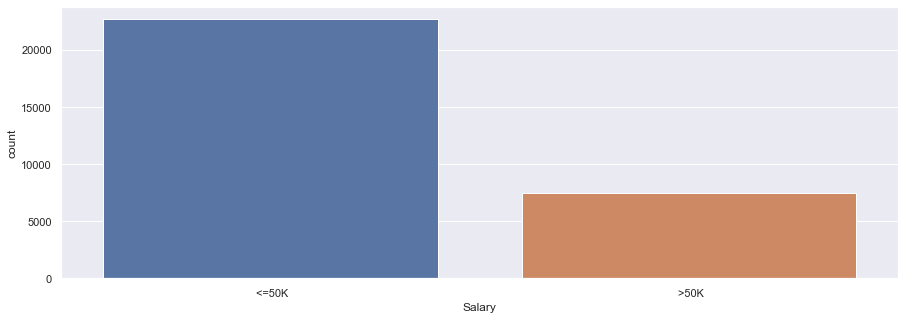

In [64]:
# countplot 
import seaborn as sns
sns.countplot(x='Salary',data=salary_train)

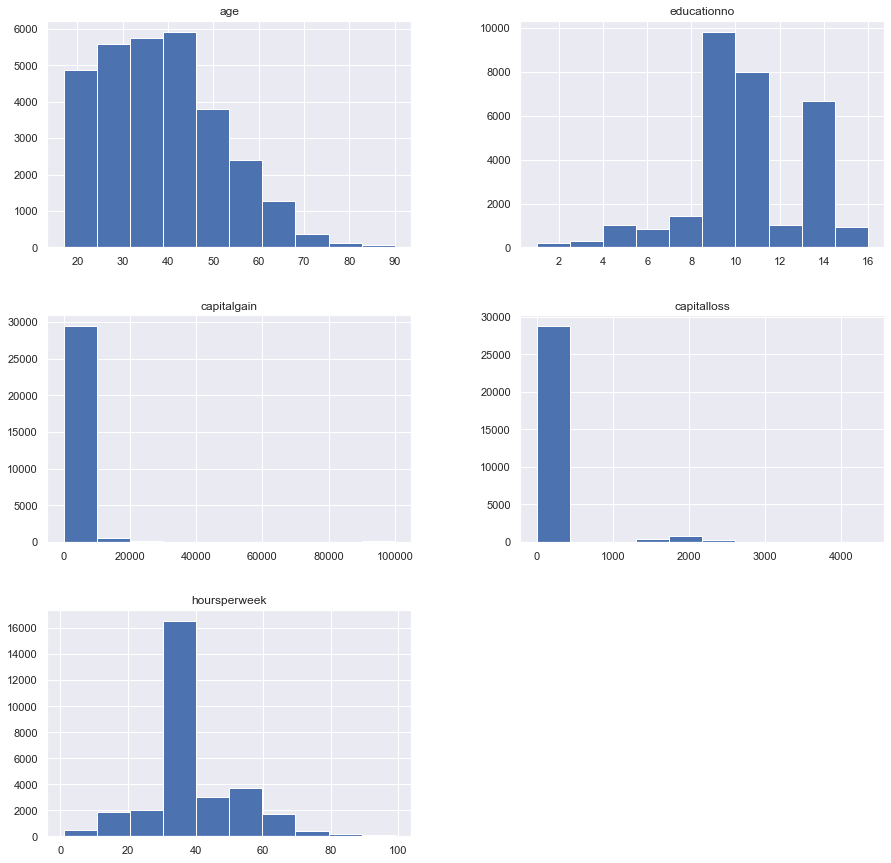

In [65]:
# histogram
import matplotlib.pyplot as plt
salary_train.hist(figsize = (15,15))
plt.show()

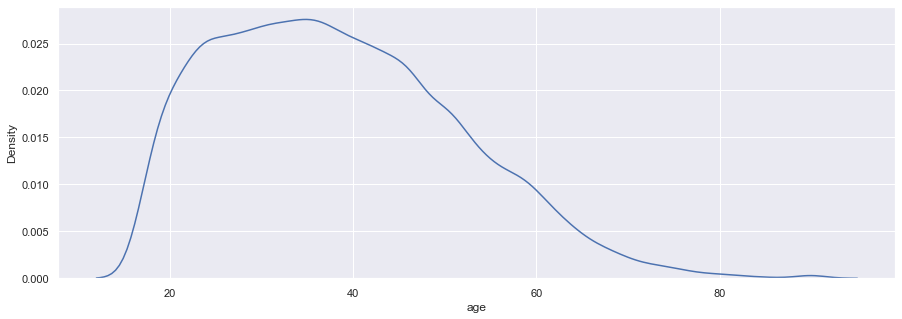

In [67]:
#kdeplot for age
import seaborn as sns
sns.kdeplot(x='age',data=salary_train)
plt.show()

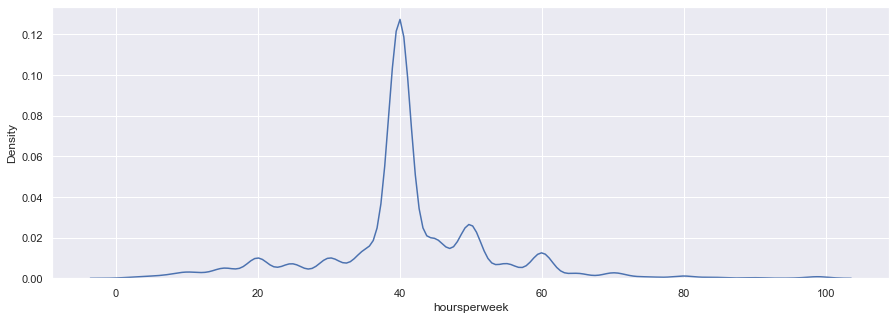

In [71]:
# kdeplot for hoursperweek
sns.kdeplot(x='hoursperweek',data=salary_train)
plt.show()

<AxesSubplot:>

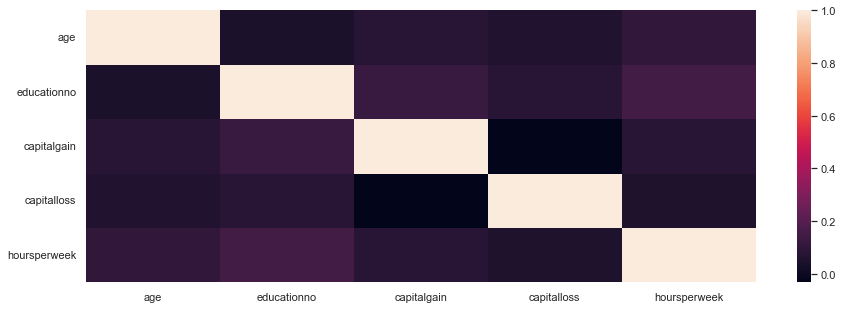

In [74]:
# Heatmap
sns.heatmap(corr)

### Feature Engineering

Replacing all vlaues >50k with 1 and <=50k with 0 with label encoder

In [14]:
columns = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']

In [15]:
salary_train[columns]

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
30156,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30157,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
30158,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
30159,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [16]:
#converting str into integer
salary_train[columns] = salary_train[columns].apply(LabelEncoder().fit_transform)

In [17]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [18]:
salary_train.duplicated().sum()

3258

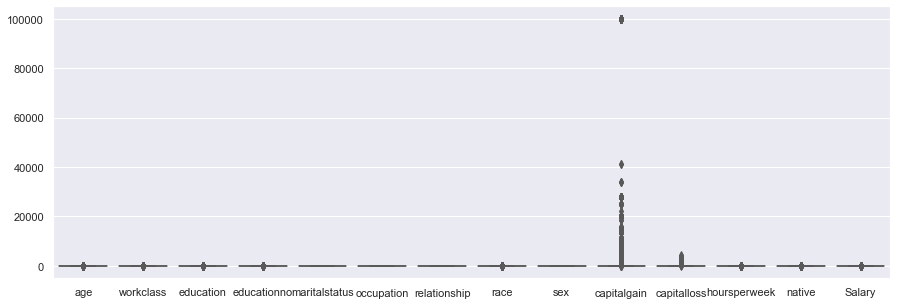

In [19]:
# To check outliers
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=salary_train, orient="v", palette="Set2") 
plt.show()

column Capitalgain shows large deviations

### Reading test data

In [89]:
salary_test = pd.read_csv('SalaryData_Test(1).csv')
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### EDA

In [90]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [91]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [92]:
salary_test.value_counts()

age  workclass          education      educationno  maritalstatus        occupation          relationship    race    sex      capitalgain  capitalloss  hoursperweek  native          Salary
40    Private            HS-grad       9             Married-civ-spouse   Craft-repair        Husband         White   Male    0            0            40             United-States   <=50K    9
31    Private            HS-grad       9             Married-civ-spouse   Craft-repair        Husband         White   Male    0            0            40             United-States   <=50K    8
33    Private            HS-grad       9             Married-civ-spouse   Machine-op-inspct   Husband         White   Male    0            0            40             United-States   <=50K    8
32    Private            HS-grad       9             Married-civ-spouse   Craft-repair        Husband         White   Male    0            0            40             United-States   <=50K    8
36    Private            HS-grad   

In [93]:
salary_test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [94]:
salary_test['sex'].value_counts()

 Male      10147
 Female     4913
Name: sex, dtype: int64

In [95]:
salary_test['education'].value_counts()

 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64

In [96]:
salary_test.duplicated().sum()

930

In [97]:
corr=salary_test.corr()
corr

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


### Visualization

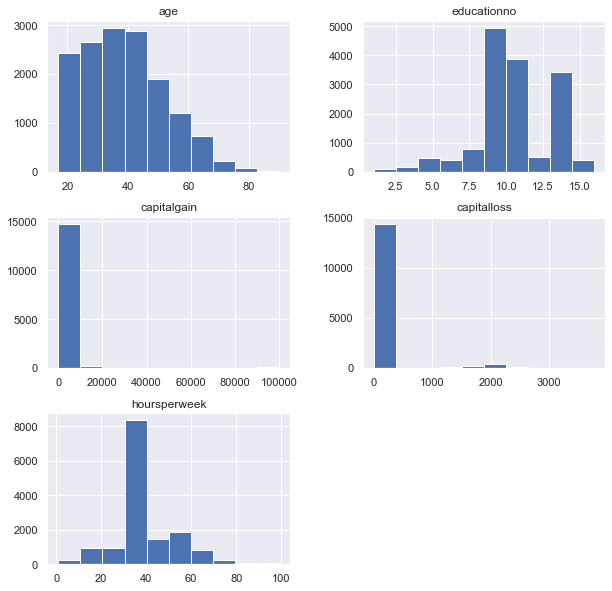

In [98]:
# Histogram
salary_test.hist(figsize=(10,10))
plt.show()

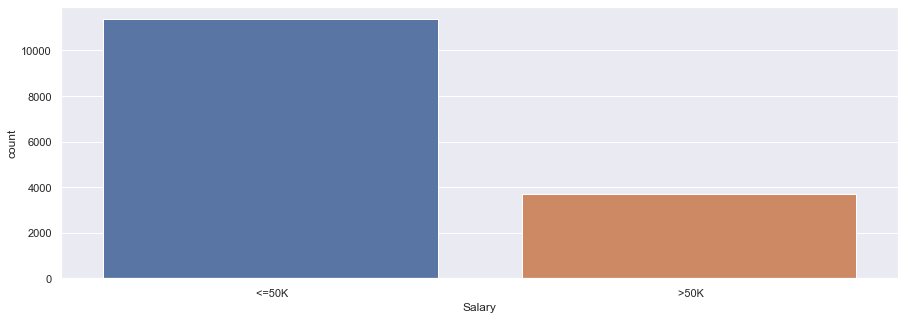

In [99]:
# Countplot for salary
sns.countplot(x='Salary',data=salary_test)
plt.show()

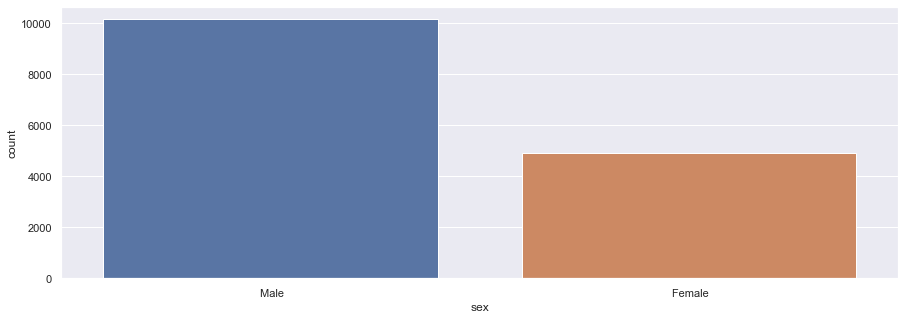

In [100]:
# Count plot for sex
sns.countplot(x='sex',data=salary_test)
plt.show()

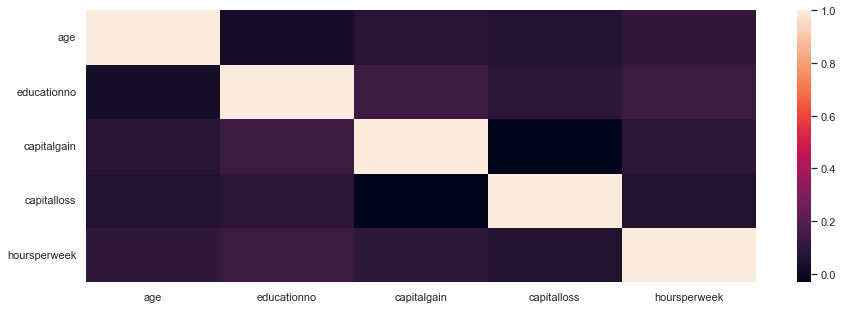

In [101]:
# heatmap
sns.heatmap(corr)
plt.show()

### Using label encoder

In [102]:
# with label encoder convert str to integer
colmn = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
salary_test[colmn] = salary_test[colmn].apply(LabelEncoder().fit_transform)
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


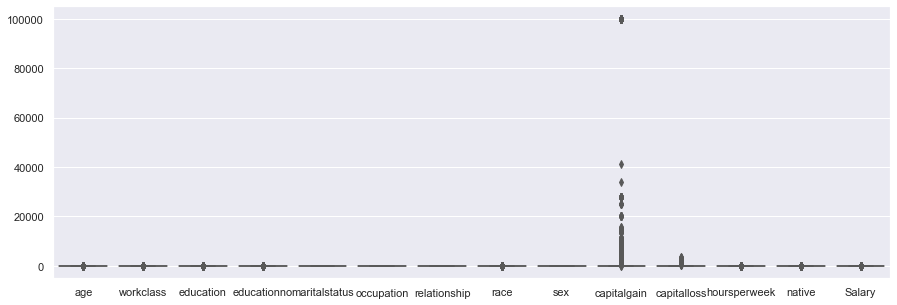

In [32]:
# Checking outliers
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=salary_test, orient="v", palette="Set2") 
plt.show()

As similary capitalgain shows outlier

### Splitting Data

In [33]:
x_train = salary_test.iloc[:,:13]
y_train = salary_test.iloc[:,13]
x_test = salary_test.iloc[:,:13]
y_test = salary_test.iloc[:,13]

In [34]:
x_train.shape,x_test.shape

((15060, 13), (15060, 13))

In [35]:
y_train.shape,y_test.shape

((15060,), (15060,))

### Normalize function

In [36]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [37]:
x_train = norm_func(x_train)
x_test = norm_func(x_test)

### Finding Accuracy using Different kernels

In [46]:
# Applying rbf kernel
clf = SVC(kernel = 'rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
print('='*30)
print('Confusion Matrix :',confusion_matrix(y_test, y_pred))

Accuracy = 83.93758300132802
Confusion Matrix : [[10690   670]
 [ 1749  1951]]


In [45]:
# Applying linear kernel
clf = SVC(kernel = 'linear')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
print('='*30)
print('Confusion Matrix :',confusion_matrix(y_test, y_pred))

Accuracy = 80.77689243027888
Confusion Matrix : [[11114   246]
 [ 2649  1051]]


In [44]:
# Applying sigmoid kernel
clf = SVC(kernel = 'sigmoid')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
print('='*30)
print('Confusion Matrix :',confusion_matrix(y_test, y_pred))

Accuracy = 58.02788844621514
Confusion Matrix : [[8240 3120]
 [3201  499]]


In [43]:
# Applying poly kernel
clf = SVC(kernel = 'poly')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
print('='*30)
print('Confusion Matrix :',confusion_matrix(y_test, y_pred))

Accuracy = 84.41567065073042
Confusion Matrix : [[10622   738]
 [ 1609  2091]]


From above SVC we can conclude that kernel poly and rbf gives best accuracy for salary data